In [1]:
import cv2
import numpy as np
from collections import namedtuple
import time
import pickle
from math import pi
from ins_nav import AHRS
from matplotlib import pyplot as plt
from squaternion import quat2euler, Quaternion

In [2]:
Data_ts = namedtuple('Data_ts', 'data timestamp')
data = pickle.load(open("data.pickle", "rb"))

In [3]:
accel = [x[0][0] for x in data['imu']]
mags = [x[0][1] for x in data['imu']]
gyros = [x[0][2] for x in data['imu']]
imutime = [x[1] for x in data['imu']]

In [4]:
ahrs = AHRS()
save = []
ot = 0
q = Quaternion(1,0,0,0)

In [5]:
for a,m,g,t in zip(accel, mags, gyros,imutime):
    # q = ahrs.updateAGM(a,m,g,1,t-ot)
    q = ahrs.updateAG(a,g,.1,t-ot)
    o = quat2euler(*q, degrees=True)
    save.append(o)
    ot = t

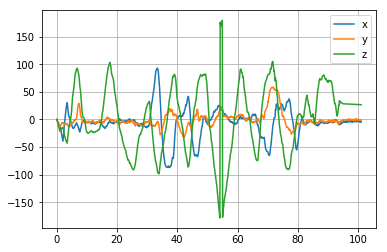

In [6]:
plt.plot(imutime, [x[0] for x in save], label='x')
plt.plot(imutime, [x[1] for x in save], label='y')
plt.plot(imutime, [x[2] for x in save], label='z')
plt.legend()
plt.grid(True)
plt.show()